<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Code-2.1" data-toc-modified-id="Code-2.1-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>Code 2.1</a></span></li><li><span><a href="#Code-2.2" data-toc-modified-id="Code-2.2-0.0.0.2"><span class="toc-item-num">0.0.0.2&nbsp;&nbsp;</span>Code 2.2</a></span></li><li><span><a href="#Code-2.3-and-2.5" data-toc-modified-id="Code-2.3-and-2.5-0.0.0.3"><span class="toc-item-num">0.0.0.3&nbsp;&nbsp;</span>Code 2.3 and 2.5</a></span></li><li><span><a href="#Code-2.3" data-toc-modified-id="Code-2.3-0.0.0.4"><span class="toc-item-num">0.0.0.4&nbsp;&nbsp;</span>Code 2.3</a></span></li><li><span><a href="#Code-2.6" data-toc-modified-id="Code-2.6-0.0.0.5"><span class="toc-item-num">0.0.0.5&nbsp;&nbsp;</span>Code 2.6</a></span></li><li><span><a href="#Code-2.7" data-toc-modified-id="Code-2.7-0.0.0.6"><span class="toc-item-num">0.0.0.6&nbsp;&nbsp;</span>Code 2.7</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercises</a></span><ul class="toc-item"><li><span><a href="#Easy" data-toc-modified-id="Easy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Easy</a></span></li><li><span><a href="#Medium" data-toc-modified-id="Medium-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Medium</a></span></li><li><span><a href="#Hard" data-toc-modified-id="Hard-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hard</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-darkgrid')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Code 2.1

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways / ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

#### Code 2.2

$$Pr(w \mid n, p) =  \frac{n!}{w!(n − w)!} p^w (1 − p)^{n−w}$$


The probability of observing six W’s in nine tosses—under a value of p=0.5

In [3]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

#### Code 2.3 and 2.5

Computing the posterior using a grid approximation.

In the book the following code is not inside a function, but this way is easier to play with different parameters

In [30]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

#### Code 2.3

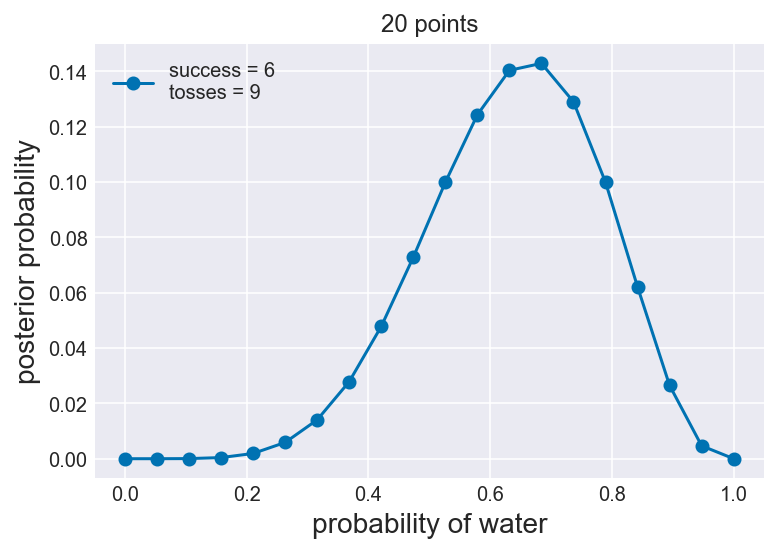

In [32]:
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

#### Code 2.6

Computing the posterior using the quadratic aproximation

In [33]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 318.32it/s]


(array(0.66666667), array([0.15713484]))

In [34]:
norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
pi

array([0.41553484, 0.91779849])

#### Code 2.7

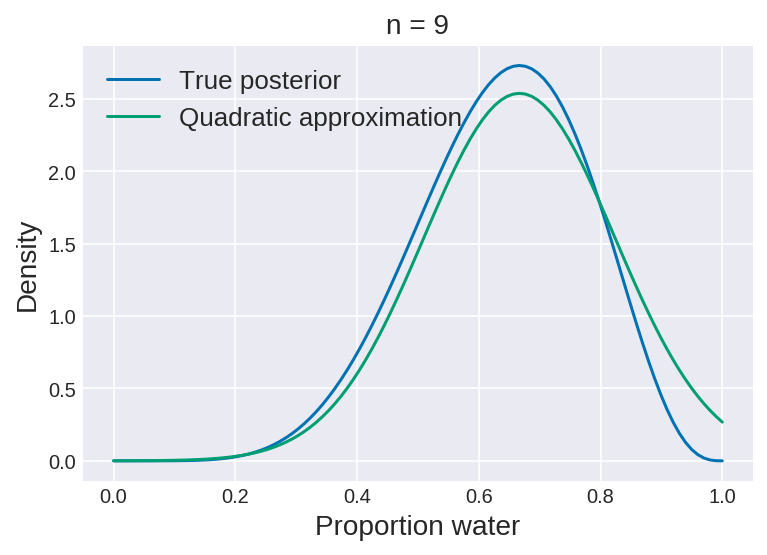

In [8]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

# Exercises

## Easy

**2E1** Which of the expression correspond to the statement: *The probability of rain on Monday?*

$$ P(rain \mid Monday) $$

**2E2** Which of the following statements corresponds to the expression: $P(Monday \mid rain)$?

> The probability that it is Monday, given that it is raining

**2E3** Which of the following expressions below correspond to the statement: *the probability that it is Monday given that it is raining*?

$$P(Monday \mid rain)$$

**2E4.** Bayesian statistician Bruno de Finetti (1906-1985) claimed: probability does not exist. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge ; it has no objective reality. Discuss the globe tossing example: what does it mean to say "The probability of water is 0.7"?

> With perfect information we can always predict a coin flip, but since we have limited knowledge about the state of the coin at any given time, we can only describe the probability with which a coin should appear, and while 0.7 is a static number, it could probably be more accurately modeled as a probability distribution with a mean of 0.7 and some standard deviation the describes the uncertainty of 0.7. The more evidence (more coin flips) that present themselves, the more the uncertainty would shrink.

## Medium

**2M1** Recall the globe tossing model — compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for $p$.

In [9]:
def posterior_grid_approximation(success, tosses, grid_points=20):
    # Define p-value grid
    p_grid = np.linspace(0, 1, grid_points)
    
    # Define uniform distribution for prior
    prior = np.repeat(1, grid_points)
    
    # Calculate liklihood using the binomial distribution
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    # Calculate posterior
    posterior = likelihood * prior
    
    # Normalize posterior
    posterior = posterior / posterior.sum()
    
    return p_grid, posterior

W, W, W

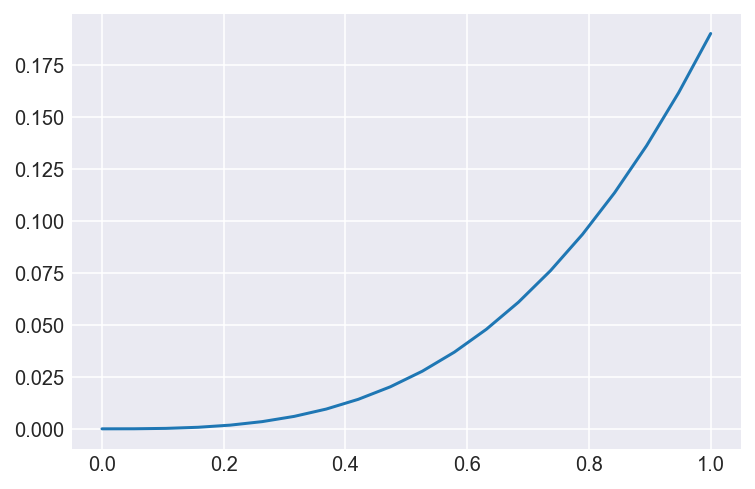

In [15]:
plt.plot(*posterior_grid_approximation(3, 3));

W, W, W, L

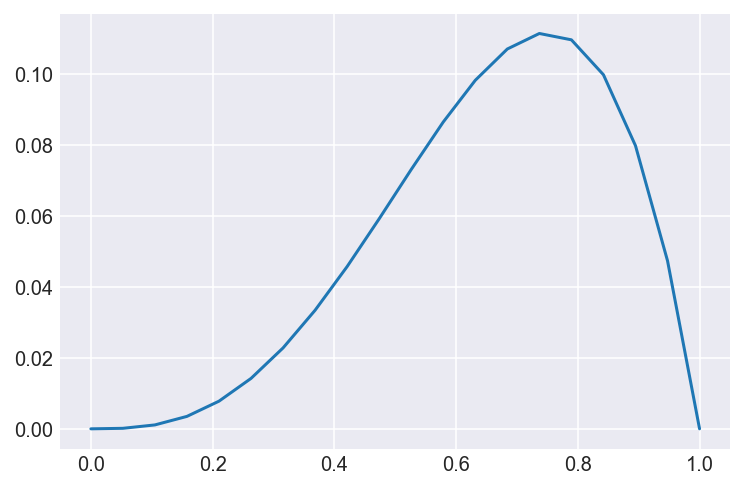

In [12]:
plt.plot(*posterior_grid_approximation(3, 4));

L, W, W, L, W, W, W

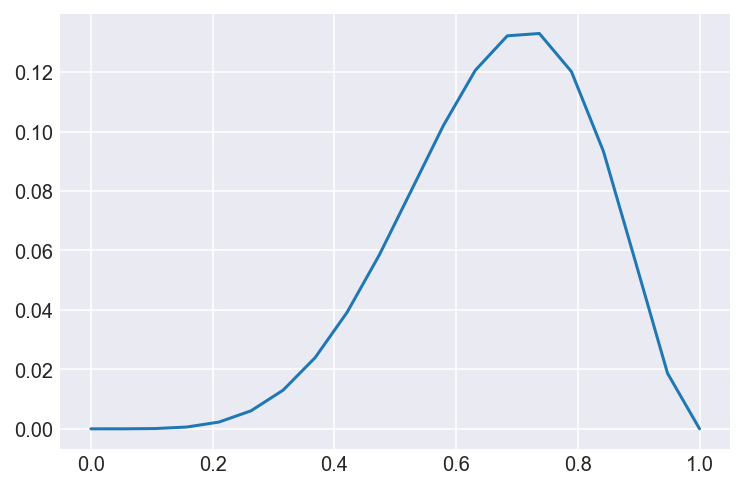

In [14]:
plt.plot(*posterior_grid_approximation(5, 7));

**2M2** Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and is a positive constant when $p >= 0.5$

In [28]:
def posterior_grid_approximation(success, tosses, grid_points=20):
    # Define p-value grid
    p_grid = np.linspace(0, 1, grid_points)
    
    # Define uniform distribution for prior
    prior = (p_grid >= 0.5).astype(int)
    
    # Calculate liklihood using the binomial distribution
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    # Calculate posterior
    posterior = likelihood * prior
    
    # Normalize posterior
    posterior = posterior / posterior.sum()
    
    return p_grid, posterior

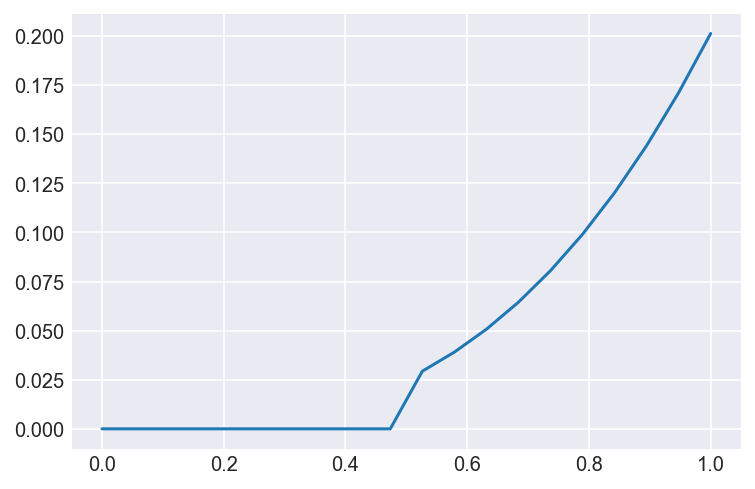

In [29]:
plt.plot(*posterior_grid_approximation(3, 3));

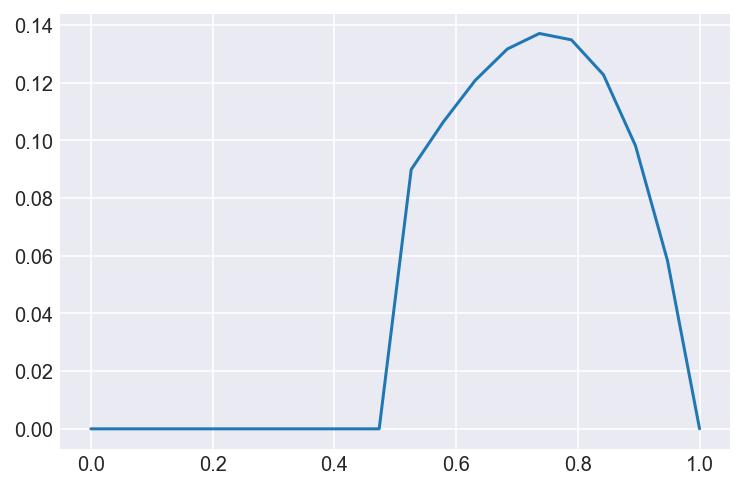

In [30]:
plt.plot(*posterior_grid_approximation(3, 4));

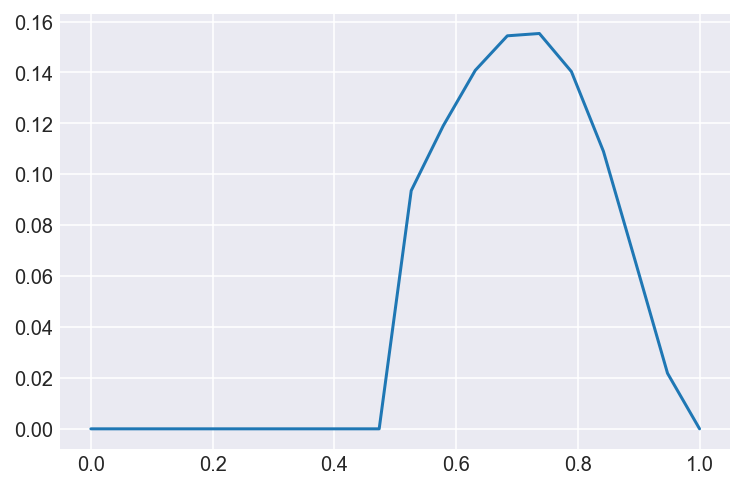

In [31]:
plt.plot(*posterior_grid_approximation(5, 7));

**2M3** Suppose there are two globes, one for earth and one for mars. The earth globe is 70% covered in water. The mars globe is 100% land. Further suppose that one of these globes — you don't know which — was tossed in the air and produced a land observation. Assume that each globe was equally likely to be tossed. Show that hte posterior probability that the globe was the earth, conditional on seeing "land" $P(earth \mid land)$ is 0.23

We know Bayes theorem is: $$P(earth \mid land) = \frac{P(land \mid earth)P(earth)}{P(land)}$$

And we know the numerator values:
$$P(land \mid earth) = 0.3$$
$$P(earth) = 0.5$$
$$P(land \mid earth)P(earth) = 0.15$$

And $P(land)$ is just the numerator + the probability of getting land for mars


$$P(land) = 0.15 + P(land \mid mars)P(mars) = 0.65$$


$$\therefore P(land \mid earth) = \frac{0.15}{0.65} \approx 0.23$$

Alternatively...

In [38]:
prior = np.array([0.5, 0.5])
likelihood = np.array([0.3, 1])
posterior = likelihood * prior
posterior = posterior / posterior.sum()
posterior

array([0.23076923, 0.76923077])

**2M4** Suppose you have a deck with only three cards. Each card has two sides and each side is either black or white. One card has two black sides, one has white/black, and the last has two white sides. A card at random is pulled out and laid flat on the table. Show the probability that the other side is black is 2/3. Use the counting method (how many ways that each card could produce the observed data).

> The double white card can never have a black side, so that's a zero. The black/white card has one way to produce the desired effect, and the black/black card has 2 ways of producing the observed data. 

> $\therefore$ the probability that the other side is black is 2/3. 

To calculate using posterior likelihood...

In [41]:
# Black/Black, Black/White, White/White
prior = np.array([0.5, 0.5, 0])
likelihood = np.array([1, 0.5, 0])
posterior = likelihood * prior
posterior / posterior.sum()

array([0.66666667, 0.33333333, 0.        ])

**2M5** Suppose there are 4 cards and the 4th is another B/B card...

In [42]:
# B/B, B/B, B/W, W/W
prior = np.array([1/3, 1/3, 1/3, 0])
likelihood = np.array([1, 1, 0.5, 0])
posterior = likelihood * prior
posterior / posterior.sum()

array([0.4, 0.4, 0.2, 0. ])

Which sums to 80% that the other side is black

**2M6** Imagine that black is heavy and so cards with black sides are heavier than cards with white sides. As a results, it's less likely that a card with black sides is pulled from the bag. So again assume that there are three cards: B/B, B/W, W/W. After experimenting a number of times, you conclude that for every way to pull a B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method as before.

> We can multiply the counts by their new associated chance of being chosen to produce a new set of circumstances: B/B, B/W, B/W, W/W, W/W, W/W. We can ignore all the W/W cards as their prior is 0. There are 2 ways the B/B card can produce the desired outcome, and 1 way each the B/W cards can produce the desired outcome. This means the probability that B/B card is the one on the table is reduced to 0.5. 

**2M7** Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table.  The face that is shown on the new card is white. Show that the probability that the first card, the one showing the black side, has black on the other side is now 0.75.

> Given the B/B card is chosen first, there are two ways to display the B/B side. Of the remaining two cards, the W/W card produces the desired outcome in 2 ways and the B/W card has 1 way. For each side of the B/B card that is $2 * 3 = 6$.  Given the B/W card is chosen, there is one way to display the desired outcome combined with two ways for the white card. $1 * 2 = 2$.  

> $\therefore$ there are 6 ways out of 8 that the B/B card was chosen first, which equals 0.75.

## Hard

**2H1** Suppose there are two species of panda bear. Both are equally common in the wild and live in the same place. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singletons. Assume these numbers are known with certainty, from many years of field research. Now suppose you are managing a captive panda breeding program. You have a new female panda and unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

$$ P(species \mid twins) $$

In [49]:
prior = np.array([0.5, 0.5])
likelihood = np.array([0.1, 0.2])
posterior = likelihood * prior
posterior = posterior / posterior.sum()
posterior

array([0.33333333, 0.66666667])

$P(twins \mid twins)$

In [50]:
# Chance of twins given the likelihood of each species
posterior[0] * likelihood[0] + posterior[1] * likelihood[1]

0.16666666666666666

**2H2** Recall all the facts of the above problem. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and it was twins.

In [51]:
posterior[0]

0.3333333333333333

**2H3** Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton. Compute the posterior probability that this panda is species A.

> We can use the posterior from our original computation as the prior for this problem

In [52]:
prior = posterior # Set our new prior to be the previously calculated posterior (1/3, 2/3)
likelihood = np.array([0.9, 0.8])
posterior = likelihood * prior
posterior / posterior.sum()

array([0.36, 0.64])

**2H4** Suppose that a vet comes along who has a new genetic test that claims can identify the species, but the test is imperfect. $P(+ \mid A) = 0.8$ and $P(+ \mid B) = 0.65$ The vet administers the test and tells you the test is positive for species A. Compute the posterior that our panda is species A. Then redo the computation using birth data.

In [57]:
prior = np.array([0.5, 0.5])
likelihood = ([0.8, 0.35])
posterior = likelihood * prior
posterior / posterior.sum()

array([0.69565217, 0.30434783])

With the birth data, we have a new prior we can use instead of equal likelihood for both species as a prior.

In [58]:
prior = np.array([0.36, 0.64])
likelihood = ([0.8, 0.35])
posterior = likelihood * prior
posterior / posterior.sum()

array([0.5625, 0.4375])